In [1]:
#importing libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt # we only need pyplot
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from datetime import datetime

In [2]:
music = pd.read_csv("cleaned_music.csv")
music

,Unnamed: 0,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
0,0,31.0,0.01270,0.622,218293.0,0.890,0.950000,D,0.124,-7.043,Minor,0.0300,115.00,0.531,Electronic
1,1,28.0,0.00306,0.620,215613.0,0.755,0.011800,G#,0.534,-4.617,Major,0.0345,127.99,0.333,Electronic
2,2,34.0,0.02540,0.774,166875.0,0.700,0.002530,C#,0.157,-4.498,Major,0.2390,128.01,0.270,Electronic
3,3,32.0,0.00465,0.638,222369.0,0.587,0.909000,F#,0.157,-6.266,Major,0.0413,145.04,0.323,Electronic
4,4,46.0,0.02890,0.572,214408.0,0.803,0.000008,B,0.106,-4.294,Major,0.3510,150.00,0.230,Electronic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40555,40555,56.0,0.13300,0.849,237667.0,0.660,0.000008,C,0.296,-7.195,Major,0.0516,99.99,0.629,Hip-Hop
40556,40556,72.0,0.15700,0.709,251860.0,0.362,0.000000,B,0.109,-9.814,Major,0.0550,122.04,0.113,Hip-Hop
40557,40557,51.0,0.00597,0.693,189483.0,0.763,0.000000,D,0.143,-5.443,Major,0.1460,131.08,0.395,Hip-Hop
40558,40558,65.0,0.08310,0.782,262773.0,0.472,0.000000,G,0.106,-5.016,Minor,0.0441,75.89,0.354,Hip-Hop


In [3]:
music = music.drop(["Unnamed: 0"], axis = 1)


From the table, unknown column "Unnamed: 0" spotted. Hence, removed.

# 4) Machine Learnning

We will use 2 predictive models to discover possible patterns in our dataset and make predictions based on them.

#### 4a) Encode categorical data

Most Machine Learning algorithms cannot work with strings; they expect to see numerical values in each feature. It is preferable to one-hot encode categorical features (those having string values), i.e., to expand number of features so that values for each class are placed in a separate column. Where the sample correspond to the given class, it gets 1 in the respective feature; all others get zeroes. Instead, categorical values in this exercise are encoded with LabelEncoder(). It assigns a number (integer) to each class. Thus, 5 distinctive classes in a categorical variable will get values between 0 and 4. It should be noted here that LabelEncoder() memorizes the classes. Therefore, an encoder is instantiated for each categorical variable. The labels (i.e., the music genre) are not encoded, which will make interpretation easier and more understandable. Tree-based algorithms accept string labels.

In [4]:
# Importing libraries
from sklearn.preprocessing import LabelEncoder

Encoding key feature

In [5]:
key_encoder = LabelEncoder()
music["key"] = key_encoder.fit_transform(music["key"])
music.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
0,31.0,0.01270,0.622,218293.0,0.890,0.950000,5,0.124,-7.043,Minor,0.0300,115.00,0.531,Electronic
1,28.0,0.00306,0.620,215613.0,0.755,0.011800,11,0.534,-4.617,Major,0.0345,127.99,0.333,Electronic
2,34.0,0.02540,0.774,166875.0,0.700,0.002530,4,0.157,-4.498,Major,0.2390,128.01,0.270,Electronic
3,32.0,0.00465,0.638,222369.0,0.587,0.909000,9,0.157,-6.266,Major,0.0413,145.04,0.323,Electronic
4,46.0,0.02890,0.572,214408.0,0.803,0.000008,2,0.106,-4.294,Major,0.3510,150.00,0.230,Electronic


In [6]:
# Printing out corresponding classes
key_encoder.classes_

array(['A', 'A#', 'B', 'C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#'],
      dtype=object)

Encoding mode feature

In [7]:
mode_encoder = LabelEncoder()
music["mode"] = mode_encoder.fit_transform(music["mode"])
music.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
0,31.0,0.01270,0.622,218293.0,0.890,0.950000,5,0.124,-7.043,1,0.0300,115.00,0.531,Electronic
1,28.0,0.00306,0.620,215613.0,0.755,0.011800,11,0.534,-4.617,0,0.0345,127.99,0.333,Electronic
2,34.0,0.02540,0.774,166875.0,0.700,0.002530,4,0.157,-4.498,0,0.2390,128.01,0.270,Electronic
3,32.0,0.00465,0.638,222369.0,0.587,0.909000,9,0.157,-6.266,0,0.0413,145.04,0.323,Electronic
4,46.0,0.02890,0.572,214408.0,0.803,0.000008,2,0.106,-4.294,0,0.3510,150.00,0.230,Electronic


In [8]:
# Printing out corresponding classes

mode_encoder.classes_

array(['Major', 'Minor'], dtype=object)

#### 4b) Exploration and Visualization

Perform basic statistical exploration and visualization on the Train Set.

We will start by setting up a Multi-Variate Classification problem.

In [9]:
# Extract Response and Predictors
y = pd.DataFrame(music["music_genre"])
predictors = ["popularity","acousticness","danceability","duration_ms","energy","instrumentalness","key","liveness","loudness","mode","speechiness","tempo","valence"]
X = pd.DataFrame(music[predictors]) 

In [10]:
# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Check the sample sizes
print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

Train Set : (30420, 1) (30420, 13)
Test Set  : (10140, 1) (10140, 13)


In [11]:
# Summary Statistics for Response
y_train["music_genre"].value_counts()

Hip-Hop        3101
Classical      3080
Country        3061
Anime          3059
Rock           3048
Electronic     3033
Jazz           3027
Rap            3018
Blues          2997
Alternative    2996
Name: music_genre, dtype: int64

In [12]:
# Summary Statistics for Predictors
X_train.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
count,30420.000000,30420.000000,30420.000000,3.042000e+04,30420.000000,30420.000000,30420.000000,30420.000000,30420.000000,30420.000000,30420.000000,30420.000000,30420.000000
mean,44.237771,0.307573,0.557673,2.455077e+05,0.598798,0.181411,5.353682,0.193544,-9.167883,0.359237,0.093620,119.785002,0.456845
std,15.581298,0.342085,0.179283,1.088975e+05,0.265758,0.325550,3.463977,0.161448,6.227040,0.479785,0.101408,30.702365,0.247755
min,0.000000,0.000000,0.059600,1.550900e+04,0.000792,0.000000,0.000000,0.013600,-47.046000,0.000000,0.022300,34.350000,0.000000
25%,34.000000,0.020100,0.441000,1.904270e+05,0.430000,0.000000,3.000000,0.096800,-10.877500,0.000000,0.036100,94.807500,0.257000
50%,45.000000,0.146000,0.568000,2.274670e+05,0.641000,0.000162,5.000000,0.126000,-7.284000,0.000000,0.048900,119.435000,0.450000
75%,56.000000,0.552000,0.687000,2.761740e+05,0.817000,0.150000,8.000000,0.243000,-5.174000,1.000000,0.098600,140.240000,0.649000
max,99.000000,0.996000,0.986000,4.497994e+06,0.998000,0.996000,11.000000,1.000000,1.949000,1.000000,0.942000,220.280000,0.987000


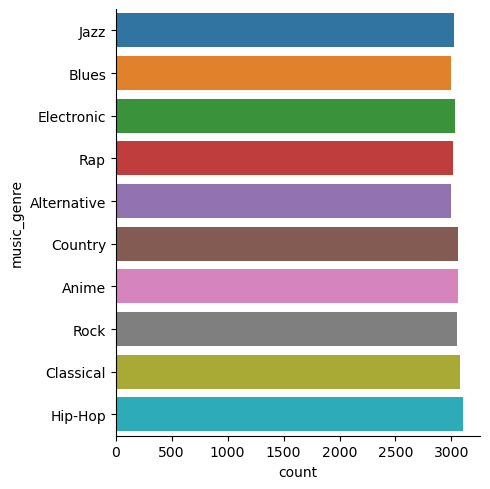

In [13]:
# Draw the distribution of Response
sns.catplot(y = "music_genre", data = y_train, kind = "count")

## 4c) Classification Tree

In [14]:
# Import DecisionTreeClassifier model from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 3)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model
y_predict = dectree.fit(X_train,y_train).predict(X_test)

In [15]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(30,20))
plot_tree(dectree, filled=True, rounded=True, fontsize = 7, 
          feature_names= X_train.columns, 
          class_names= ["Classical","Jazz","Country","Rock","Hip-Hop","Rap","Anime","Alternative","Blues","Electronic"])

[Text(0.5, 0.875, 'popularity <= 47.5\ngini = 0.9\nsamples = 30420\nvalue = [2996, 3059, 2997, 3080, 3061, 3033, 3101, 3027, 3018\n3048]\nclass = Anime'),
 Text(0.25, 0.625, 'loudness <= -16.993\ngini = 0.852\nsamples = 16754\nvalue = [1192, 3000, 2695, 2904, 1870, 2531, 125, 2371, 28\n38]\nclass = Jazz'),
 Text(0.125, 0.375, 'danceability <= 0.494\ngini = 0.399\nsamples = 2929\nvalue = [5, 290, 81, 2236, 17, 38, 2, 259, 0, 1]\nclass = Rock'),
 Text(0.0625, 0.125, 'gini = 0.285\nsamples = 2511\nvalue = [3, 216, 24, 2107, 6, 15, 0, 139, 0, 1]\nclass = Rock'),
 Text(0.1875, 0.125, 'gini = 0.769\nsamples = 418\nvalue = [2, 74, 57, 129, 11, 23, 2, 120, 0, 0]\nclass = Rock'),
 Text(0.375, 0.375, 'popularity <= 25.5\ngini = 0.842\nsamples = 13825\nvalue = [1187, 2710, 2614, 668, 1853, 2493, 123, 2112, 28, 37]\nclass = Jazz'),
 Text(0.3125, 0.125, 'gini = 0.504\nsamples = 2344\nvalue = [12, 1601, 335, 117, 28, 179, 4, 58, 4, 6]\nclass = Jazz'),
 Text(0.4375, 0.125, 'gini = 0.84\nsamples = 114

## 4d) Confusion Matrix

#### We start by Finding Optimal Depth via K-fold Cross-Validation
We use a range of tree depths to evaluate and to plot the estimated performance +/- 2 standard deviations for each depth using K-fold cross validation. We provide a Python code that can be used in any situation, where you want to tune your decision tree given a predictor tensor X and labels Y. The code includes the training set performance in the plot, while scaling the y-axis to focus on the cross-validation performance.

In [16]:
# Import essential models and functions
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

# function for fitting trees of various depths on the training data using cross-validation
def run_cross_validation_on_trees(X, y, tree_depths, cv=5, scoring='accuracy'):
    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    accuracy_scores = []
    for depth in tree_depths:
        tree_model = DecisionTreeClassifier(max_depth=depth)
        cv_scores = cross_val_score(tree_model, X, y, cv=cv, scoring=scoring)
        cv_scores_list.append(cv_scores)
        cv_scores_mean.append(cv_scores.mean())
        cv_scores_std.append(cv_scores.std())
        accuracy_scores.append(tree_model.fit(X, y).score(X, y))
    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    accuracy_scores = np.array(accuracy_scores)
    return cv_scores_mean, cv_scores_std, accuracy_scores
  
# function for plotting cross-validation results
def plot_cross_validation_on_trees(depths, cv_scores_mean, cv_scores_std, accuracy_scores, title):
    fig, ax = plt.subplots(1,1, figsize=(15,5))
    ax.plot(depths, cv_scores_mean, '-o', label='mean cross-validation accuracy', alpha=0.9)
    ax.fill_between(depths, cv_scores_mean-2*cv_scores_std, cv_scores_mean+2*cv_scores_std, alpha=0.2)
    ylim = plt.ylim()
    ax.plot(depths, accuracy_scores, '-*', label='train accuracy', alpha=0.9)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Tree depth', fontsize=14)
    ax.set_ylabel('Accuracy', fontsize=14)
    ax.set_ylim(ylim)
    ax.set_xticks(depths)
    ax.legend()

# fitting trees of depth 1 to 24
sm_tree_depths = range(1,25)
sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores = run_cross_validation_on_trees(X_train, y_train, sm_tree_depths)

# plotting accuracy
plot_cross_validation_on_trees(sm_tree_depths, sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores, 
                               'Accuracy per decision tree depth on training data')


In [17]:
#printing out the optimum depth

idx_max = sm_cv_scores_mean.argmax()
sm_best_tree_depth = sm_tree_depths[idx_max]
sm_best_tree_cv_score = sm_cv_scores_mean[idx_max]
sm_best_tree_cv_score_std = sm_cv_scores_std[idx_max]
print('The depth-{} tree achieves the best mean cross-validation accuracy {} +/- {}% on training dataset'.format(
      sm_best_tree_depth, round(sm_best_tree_cv_score*100,5), round(sm_best_tree_cv_score_std*100, 5)))

The depth-9 tree achieves the best mean cross-validation accuracy 51.46614 +/- 0.916% on training dataset


The method selects tree depth 9-10 because it achieves the best average accuracy on training data using cross-validation folds with size 5. The lower bound of the confidence interval of the accuracy is high enough to make this value significant. When more nodes are added to the tree, it is clear that the cross-validation accuracy changes towards zero.

#### Now we print the confusion matrix

In [18]:
# Extract Response and Predictors
y = pd.DataFrame(music['music_genre'])
X = pd.DataFrame(music[predictors])
# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25) 
# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 10)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(25, 10))
sns.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 10}, ax = axes[0])
sns.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 10}, ax = axes[1])

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6058514135437212

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.5172583826429981



<AxesSubplot:>

In the above confusion matrix, 0-9 are the indexes for ["Classical","Jazz","Country","Rock","Hip-Hop","Rap","Anime","Alternative","Blues","Electronic"] respectively

The "Goodness of Fit" refers to the performance of the model, which has been evaluated using the accuracy metric. The accuracy metric measures the proportion of correctly classified instances out of all instances.

In this case, the model was trained on a training dataset and tested on a separate testing dataset. The classification accuracy for the training dataset was found to be 0.57 to 0.60 depending on the depth of tree, which means that the model correctly classified 57% to 60% of the instances in the training dataset. The classification accuracy for the testing dataset was found to be around 0.51, which means that the model correctly classified 51% of the instances in the testing dataset.

This shows that the decision tree may be an acceptable model for predicting song genres

# Second Machine Learning Model: Random Forest classifier

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

Import the necessary functions for Random Forest model.

In [20]:

rf = RandomForestClassifier(random_state=50,n_estimators=5,max_depth=4,min_samples_leaf=1)
rf.fit(X_train, y_train.values.ravel())

RandomForestClassifier(max_depth=4, n_estimators=5, random_state=50)

Do the necessary imports, spliting data into train and test set. Setting up Randomforestclassifier with preset "Random_state", "N-estimators=5" (Number of trees in the forest), "Max_depth=4" (Depth of the tree), "min_samples_leaf =1" (min leaf to determine the split). Fitting the train values into the model.

Random_State: Control the randomness involved in machine learning models
n_estimators: Number of trees to build in the forest.
max_depth: The depth of a tree.
min_samples_leaf : Minimum number of samples required to be at a leaf node.

In [21]:
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", accuracy_score(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", accuracy_score(y_test, y_test_pred))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(25, 10))
sns.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 10}, ax = axes[0])
sns.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 10}, ax = axes[1])

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.46969099276791587

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.46617357001972387



<AxesSubplot:>

Using random forest classifier for the data training, with some pre-defined parameter returns both train and test classification accuracy of 0.47. which means that the model correctly classified 47% of the instances in both training and testing dataset. To further improve our modelling, we went on to implement GridSearch CV to improve our model.


## Implementing GridSearchCV


In [22]:
from sklearn.model_selection import GridSearchCV

#### The code below takes around 12minutes to run, since GridSearchCV fit algorithm is O(n^2) at best, so it is extremely slow. Hyper parameters tuning.

In [23]:
grid_param = {
    "n_estimators": [10, 15, 20, 25, 30, 35],
    "max_depth": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "min_samples_leaf": [1, 2, 3, 4, 5]
}
grid_search = GridSearchCV(RandomForestClassifier(),param_grid=grid_param,scoring="accuracy",cv=5)
grid_search.fit(X_train,y_train.values.ravel())

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'n_estimators': [10, 15, 20, 25, 30, 35]},
             scoring='accuracy')

In the grid_param {} each dictionary in the list will be used to explore. GridSearchCV for hyperparameter tuning in order to locate the best hyperparameters and improve model performance. In the function we predefined a list of values in grid_param for max_depth, n_estimators and minimum sample leaf to be looped through and fit the model on our training set.

In [24]:
grid_search.best_params_

{'max_depth': 10, 'min_samples_leaf': 3, 'n_estimators': 35}

Retrieving the best parameters for model learning.

In [25]:
rf3 = RandomForestClassifier(n_estimators = grid_search.best_params_['n_estimators'], max_depth = grid_search.best_params_['max_depth'], min_samples_leaf = grid_search.best_params_['min_samples_leaf'])
rf3.fit(X_train, y_train.values.ravel())

RandomForestClassifier(max_depth=10, min_samples_leaf=3, n_estimators=35)

Fitting the best parameters into the classifier.

In [26]:
y_train_pred3 = rf3.predict(X_train)
y_test_pred3 = rf3.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", accuracy_score(y_train, y_train_pred3))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", accuracy_score(y_test, y_test_pred3))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(25, 10))
sns.heatmap(confusion_matrix(y_train, y_train_pred3),
           annot = True, fmt=".0f", annot_kws={"size": 10}, ax = axes[0])
sns.heatmap(confusion_matrix(y_test, y_test_pred3), 
           annot = True, fmt=".0f", annot_kws={"size": 10}, ax = axes[1])

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6639381985535832

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.5608481262327416



<AxesSubplot:>

Using the GridSearch CV does returns us a better classification accuracy. Random forest classifiers generated a better outcome than decision tree after applying both models to our dataset. Therefore, the best method would be to forecast music genres using random forest classifiers. 

Although the outcome might not be the best, 0.66 and 0.56 accuracy are regarded as relatively decent in predicting the music genres based on audio attributes given that it comprises numerous classes and does not have a strong association between each variable and its response "genre". Hence, based on the research and findings we have done, it is possible to predict the genre of a song using its auditory characteristics. However, there are more to be explored.